In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import numpy as np

In [42]:
file_path = "member.uid___A001_X2d20_X398b._NAv1.177__sci.spw27.cube.I.pbcor.fits-Z-profile-Region_3-Statistic_Mean-Coordinate_Current-2025-07-10-09-06-27.tsv"

df = pd.read_csv(file_path, sep="\t", skiprows=5)
df.columns = [col.strip().lstrip("#").strip() for col in df.columns]

df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors='coerce')
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors='coerce')
df = df.dropna()

x = df[df.columns[0]]
y = df[df.columns[1]] * 1000  #Jy → mJy

my_lines =[(90.060, "CN v=0"), (91.528, "13CO v=0")] #freq. , label

In [43]:
#define binning & boxcar smoothing
def boxcar_smooth(y, kernel_size):
    kernel = np.ones(kernel_size)/kernel_size
    return np.convolve(y, kernel, mode="same")

def rebin_spectrum(x, y, bin_size):
    x = np.array(x)
    y = np.array(y)
    n_bins = len(y) // bin_size
    x = x[:n_bins * bin_size]
    y = y[:n_bins * bin_size]
    x_binned = x.reshape(n_bins, bin_size).mean(axis=1)
    y_binned = y.reshape(n_bins, bin_size).mean(axis=1)
    return x_binned, y_binned

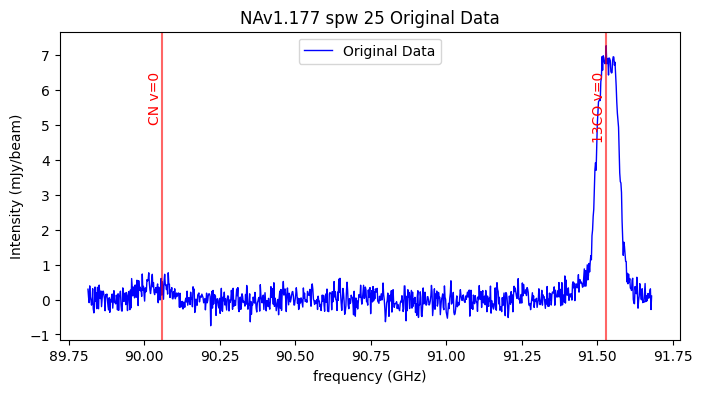

In [44]:
#original data
plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Original Data", color="blue", linewidth=1)
plt.xlabel("frequency (GHz)")
plt.ylabel("Intensity (mJy/beam)")
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(y)*0.9, label, rotation=90, color="red", fontsize=10, ha='right', va='top')
plt.title("NAv1.177 spw 25 Original Data")
plt.grid(False)
plt.legend()
plt.show()

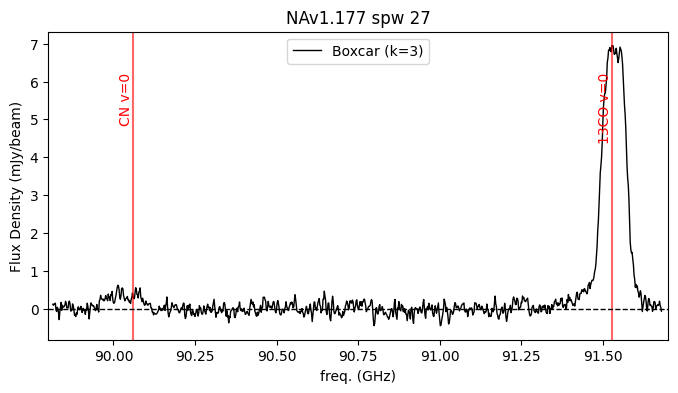

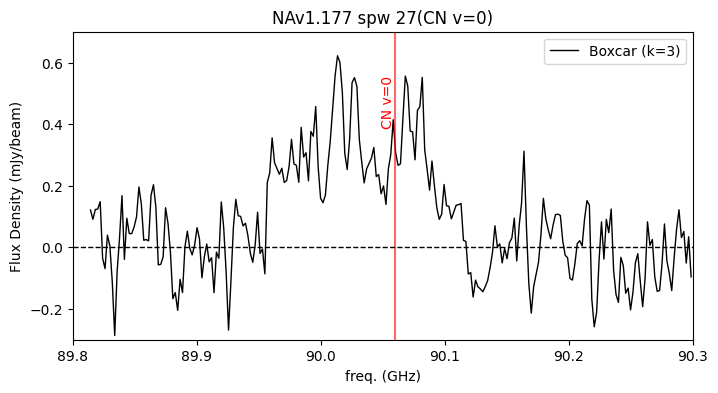

In [59]:
'''
#if you need to binning + boxcar smoothing

x_binned, y_binned = rebin_spectrum(x, y, bin_size=    )
y_binned_boxcar = boxcar_smooth(y_binned, kernel_size=    )

plt.figure(figsize=(8, 4))
plt.plot(x_binned, y_binned_boxcar, color="black", linewidth=1, label="Boxcar (k=    )+binning(b=    )")
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(y_binned_boxcar)*0.1, label, rotation=90, color="red", fontsize=10, ha='right', va='top')
plt.xlabel("frequency (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("    ")
plt.xlim(    ,     )
#plt.ylim(    ,     )
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.grid(False)
plt.legend()

'''
#if you just need boxcar smoothing

y_boxcar = boxcar_smooth(y, kernel_size=3)

plt.figure(figsize=(8, 4))
plt.plot(x, y_boxcar, color="black", linewidth=1, label="Boxcar (k=3)")
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(y_boxcar)*0.9, label, rotation=90, color="red", fontsize=10, ha='right', va='top')
plt.xlabel("freq. (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("NAv1.177 spw 27")
plt.xlim(89.80,91.70)
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.grid(False)
plt.legend()

mask = (x >= 89.80) & (x <= 90.30)
x_mask = x[mask]
y_mask = y_boxcar[mask]

plt.figure(figsize=(8, 4))
plt.plot(x_mask, y_mask, color="black", linewidth=1, label="Boxcar (k=3)")
for freq, label in my_lines:
    if freq < 90.25:
        plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
        plt.text(freq, max(y_mask)*0.9, label, rotation=90, color="red", fontsize=10, ha='right', va='top')
plt.xlabel("freq. (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("NAv1.177 spw 27(CN v=0)")
plt.xlim(89.80,90.30)
plt.ylim(-0.3, 0.7)
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.grid(False)
plt.legend()


